# Førsteordens ligninger

## 1. Transportligning

La oss ta en nærmere titt på ligningen

$$
u_t + a(x,t) u_x = f(x,t), \quad u(x,0)=g(x)
$$

som er den mest generell førsteordens lineær ligning i to variabler.

Betrakt den ordinære differensialligningen (den karakteristiske ligningen)

$$
\frac{dx}{dt} = a(x,t), \quad x(0) = x_0
$$

Vi kaller løsninger $x(t)$ til ligningen over for **karakteristikker**. Siden de er ordinære differensialligninger lar de seg løses relativt lett, med f eks Eulers metode. De forteller oss mye om løsninger til transportligning.

Det viser seg nemlig (ved hjelp av kjerneregelen) at

$$
u\big( x(t),t \big) = u(x_0,0) + \int_0^t f\big( x(s),s \big) ds
$$

Hvis vi setter inn en løsning $x(t)$ til den karakteristiske ligningen i uttrykket over, sammen med $f$ og $g$, får vi en løsning $u$ til transportligningen.

Det er spesielt lettvint når $f(x,t)=0$, siden vi slipper å beregne integeralet, og da er $u$ konstant langs linjer $x(t)$.

Teknikken er trolig best forklart gjennom eksempler.

## Eksempel 1 - konstant hastighet

La $a(x,t)=a$. Da løser karakteristikkene

$$
\frac{dx}{dt} = a,\quad x(0)=x_0
$$

slik at $x(t) = x_0 + at$. De er altså rette linjer med stigningstall $a$.

Vi har

$$
u(x_0 + at, t) = g(x_0) + \int_0^t f\big( x_0 + as, s\big) dt
$$

Vi ønsker å finne $u(x,t)$ for tilfeldig $x$ og $t$. Det vi må gjøre er å **spore tilbake** langs en karakteristikk, dvs å finne $x_0$ slik at karakteristikken $x(t)$ fra $x_0$ tar oss til punktet $x=x(t)$ etter tid $t$.

Nå siden karakteristikkene er gitt av $x = x_0 + at$, sporer vi tilbake ved å løse uttrykket for $x_0$, altså vi finner $x_0 = x - at$. Dermed får vi

$$
u(x,t) = g(x-at) + \int_0^t f(x - at + as, s)\, ds
$$


### a)

Hvis $f(x,t)=0$ har vi utledet løsning fra 5_1, $u(x,t)=g(x-at)$.

### b)

La $g(x) = \cos(x)$, og $f(x,t)=\sin(x)$. Vi beregner

$$
\int_0^t f(x-at+as,s)ds = \int_0^t \sin(x-at+as) ds = \big[ -\frac{1}{a}\cos(x-at+as) \big]^t_0 = 
\frac{1}{a}\big( -\cos(x) + \cos(x-at) \big)
$$

Løsningen er

$$
u(x,t) = g(x-at) \int_0^t f(x - at + as, s)\, ds
= \left( 1 + \frac{1}{a}\right) \cos(x-at) - \frac{1}{a} \cos(x)
$$

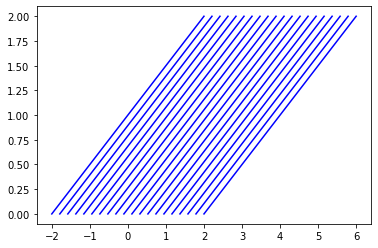

In [12]:
# plotter karakteristikkene

import numpy as np
import matplotlib.pyplot as plt

n = 100
m = 20

t = np.linspace(0,2,n).reshape((n,1))


# en vektor med initialpunkter x0 for karakteristikkene
x0 = np.linspace(-2,2,m).reshape((1,m))

c = np.ones((1,n))
d = np.ones((n,1))


a = 2

# en matrise hvor kolonne i er en x-verdiene for en karakteristikk gjennom x0(i)
x = d @ x0  + t * a

# en matrise hvor kolonne i er t-verdiene for en karakteristikk gjennom x0(i)
u = t @ c

for i in np.arange(m):
    plt.plot(x[:,i],u[:,i], color='b')

## Randbetingelser

Så langt har vi bare oppgitt initialbetingelser $u(0,x)=g(x)$. Men hva om ligningen er kun definert på $b < x <c$? 

Det viser seg at vi kun trenger randbetingelser på den "upwind" side, dvs siden vi forlate intervallet når vi sporer tilbake langs karakteristikker.

For eksempel, om $a > 0$ sporer vi tilbake til venstre, og det er da $u(t,b)=h(t)$ som blir randbetingelsen vi trenger.

## Eksempel 2 - med randbetingelser

Betrakt ligningen

$$
u_t + a u_x = f(x,t), \quad 0<x<1, \quad u(x,0)=g(x), \quad  u(0,t)=h(t)
$$

Anta at $a>0$, slik at randbetingelsene er av den "upwind" type, siden vi har oppgitt $u(0,t)=h(t)$ på den venstre randen $x=0$ og $a$ er positiv.

Karakteristikkene er fortsett det samme, dvs $x=x_0 + at$. Men når vi sporer tilbake ved å sette $x_0 = x - at$ har vi to alternativer:

1. $x_0$ er mellom 0 og 1, og vi får samme løsning som før
2. $x_0$ er mindre enn 0, og vi må heller finne tiden $s$ hvor vi forlot omradet, dvs hvor $x(s) = 0$.

Vi ser at alternative 1 inntreffer om $x > at$, mens om $x < at$ får vi alternativ 2.

Hvis alternativ 2 stemmer vil vi finne $s$ slik at $x(s) = x_0 + as = 0$. Vi setter inn $x_0 = x - at$ og får $x - at + as = 0$, med løsning $s = \frac{at - x}{a} = t - \frac{x}{a}$.

Løsningen i alternativ 2 er da gitt av $u(x,t) = u(x(s),s) = u(0,s) = h(s)$.

Vi har altså:

$$
u(x,t) = \left\{
\begin{array}[cc]
& g(x-at) & \quad x > at \quad (\mathrm{Alternativ}\; 1) \\
h\left(t - \frac{x}{a}\right) & \quad x < at \quad (\mathrm{Alternativ}\; 2)
\end{array}
\right.
$$

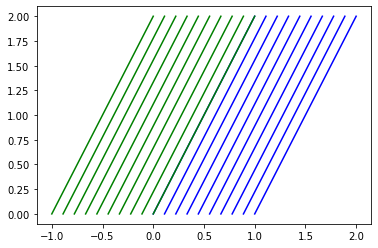

In [20]:
# Plott med to farger.

import numpy as np
import matplotlib.pyplot as plt

n = 100
m = 10

t = np.linspace(0,2,n).reshape((n,1))

# deler opp initial verdier for karakteristikkene

# disse initialverdier er i område 0<x<1
x0 = np.linspace(0,1,m).reshape((1,m))
# disse initalverdier er utenfor området, til venstre
y0 = np.linspace(-1,0,m).reshape((1,m))

c = np.ones((1,n))
d = np.ones((n,1))


a = 0.5

x = d @ x0  + t * a
y = d @ y0 + t * a

u = t @ c

for i in np.arange(m):
    # de blå linjene er alternativ 1 - de går gjennom t=0, 0 < x <1
    plt.plot(x[:,i],u[:,i], color='b')
    # de grønne linjene er alternativ 1 - de går ut av området 0 < x < 1 på venstre for t>0
    plt.plot(y[:,i],u[:,i], color='g')

## Eksempel 3 - ikke konstant hastighet

*Obs: dette eksempel er på en vanskelighetsgrad høyere enn det vi trenger for prosjektene. Det kan likevel hjelpe med forståelse av lettere eksempler som 1, 2 og 4.*

La oss nå betrakte ligningen

$$
u_t + x u_x = f(x,t), \quad u(x,0) = g(x)
$$

Vi har altså en transportligning med $a(x,t) = x$. Den karakterstiske ligningen blir da

$$
\frac{dx}{dt} = x, \quad x(0)=x_0
$$

som har løsninger $x(t)=x_0 e^t$ (se under).

Vi har da

$$
u\big(x(t),t \big) = u(x(0),0) + \int_0^t f\big( x(s), s\big) ds
$$

For å "spore tilbake" til tid $t=0$, må vi bruke at

$$
x_0 = x(t) e^{-t}
$$

For å spore tilbake til tid "s" bruker vi heller

$$
x(s) = x_0 e^s = x(t) e^{-t} e^s = x(t) e^{s-t} 
$$

Vi har altså

$$
u(x,t) = u(xe^{-t},0) + \int_0^t f(xe^{s-t},s) ds
$$

som ved å sette inn initialbetingelsen $u(x,0)=g(x)$ gir

$$
u(x,t) = g(xe^{-t}) + \int_0^t f(xe^{s-t},s) ds
$$

### a)

La $f(x,t) = x + t$ og $g(x) = \log(x)$

Da har vi

$$
\int_0^t f(xe^{s-t},s)ds = \int_0^t xe^{s-t} + s ds = \big[xe^{s-t} + \frac{1}{2}s^2\big]^t_0 
= x + \frac{1}{2}t^2 - xe^{-t}
$$

og siden

$$
g(xe^{-t}) = \log(xe^{-t}) = \log(x) + \log(e^{-t}) = \log(x) - t
$$

vi har

$$
u(x,t) = \log(x) - t + x + \frac{1}{2}t^2 - xe^{-t}
$$

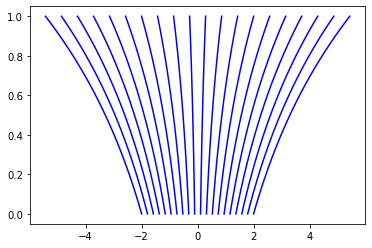

In [21]:
## plott av karakteristikkene

n = 100
m = 20

t = np.linspace(0,1,n).reshape((n,1))

# initalverdiene
x0 = np.linspace(-2,2,m).reshape((1,m))

c = np.ones((1,n))
d = np.ones((n,1))

x = d @ x0  * np.exp(t)

u = t @ c

for i in np.arange(m):
    plt.plot(x[:,i],u[:,i], color='b')

## 2. Bevaringslover

En vanlig type ligning er

$$
u_t + f(u)_x = 0
$$

Den kalles for en **bevaringslov** med **fluks** $f(u)$, siden den forklarer hvordan $u$ endrer seg da den er utsatt for en fluks $f$.

Mer forklaring om den fysiske tolkning av $f$ og ligningen kommer i 5_4.

Legg merke til at det kan skrives om til

$$
u_t + a(x,t,u)u_x = 0,
$$

hvor $a = f_u$. Det er en ligning av samme type som (1), den er bare ikke lineær lenger pga avhengighet av $a$ på $u$. Men fortvil ikke! Vi kan fortsett beregne karakteristikkene som før!

Poenget er at siden $u$ er konstant på karakteristikkene, vi kan løse

$$
\frac{dx}{dt} = a\big(x,t, u(x(0),0)\big), \quad x(0) = x_0
$$

## Eksempel 4 - Burgers ligning

Den enkleste ikke-lineær bevaringslov er Burgers ligning, hvor $f(u) = \frac{1}{2}u^2$

Da er $a = f_u = u$, slik at karakteristikkene løser

$$
\frac{dx}{dt} = u(x(0),0) = g(x_0),
$$

dvs de er rett linjer gjennom $(x_0, 0)$, med stigningstall lik $g(x_0)$.

**Oppgave**: Tegn noen slike linjer. Hva ser du? Ta som initial verdi både

**a)**
$$
g(x) = \left\{
\begin{array}[cc]
&0 \quad & x\leq 0 \\
-1 \quad & x>0
\end{array}
\right.
$$

og 

**b)**
$$
g(x) = \left\{
\begin{array}[cc]
&-1 \quad & x\leq 0 \\
0 \quad & x>0
\end{array}
\right.
$$

### a) Sjokk

Det første eksemplet viser hva som kan skje med slike ligninger.

For enkelte verdier av $(x,t)$ er det umulig å "spore tilbake", fordi det er flere karakteristikker som går gjennom samme punkt.

Skal vi velge -1 og 0 som verdi?

Slike situasjoner oppstår ofte i fysiske modeller, og er forbindet med **sjokk**, for eksempel et overlydssmell, eller kødannelse i trafikk.

Ofte er det likevel mulig å legge til et kriteriet som forklarer hva verdien burde være. Heldigvis gir numeriske beregninger ofte det riktige svar i slike situasjoner, så vi vel utsette videre diskusjon til 6_3.

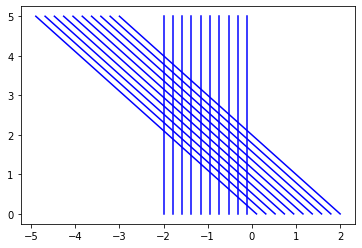

In [9]:
## Plott karakteristikkene

n = 100
m = 20

t = np.linspace(0,5,n).reshape((n,1))

x0 = np.linspace(-2,2,m).reshape((1,m))

c = np.ones((1,n))
d = np.ones((n,1))


u0 = np.zeros((1,m))

for i in np.arange(m):
    if x0[0,i]<= 0:
        u0[0,i] = 0
    else:
        u0[0,i] = -1 

x = d @ x0  + t @ u0

u = t @ c

for i in np.arange(m):
    plt.plot(x[:,i],u[:,i], color='b')

### b) Fortynningsbølge

Vi støter på et annet problem i situasjon b - det finnes noen verdier $(x,t)$ som ikke er truffet av karakteristikkene fra $t=0$ i det hele tatt.

Det kalles for en *fortynningsbølge*, siden det oppstår i modeller av en gass under kompresjon som blir sluppet løs, og dermed fortynnes samtidig som den eksapanderer for å fylle et større rom.

Hva blir løsningen der da?

Det samme kommentar gjelder som i a) - det finnes måter å spesifere ut fra fysikken/modellen hva løsningen burde være, men nok en gang kan vi i det fleste tilfelle stole på at numerikken gir det riktige svar.

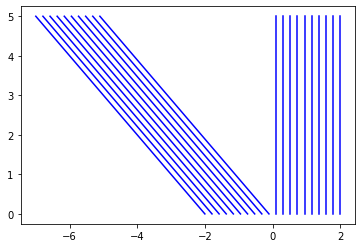

In [10]:
## Plott karakteristikkene

n = 100
m = 20

t = np.linspace(0,5,n).reshape((n,1))

x0 = np.linspace(-2,2,m).reshape((1,m))

c = np.ones((1,n))
d = np.ones((n,1))


u0 = np.zeros((1,m))

for i in np.arange(m):
    if x0[0,i]<= 0:
        u0[0,i] = -1
    else:
        u0[0,i] = 0

x = d @ x0  + t @ u0

u = t @ c

for i in np.arange(m):
    plt.plot(x[:,i],u[:,i], color='b')

## 3. Transportligning - flere dimensjoner

Vi kan også betrakt ligninger av type

$$
\vec{u}_x + A(x,t)\vec{u}_t = \vec{f}(x,t),
$$

Hvor
$$
\vec{u} = \begin{pmatrix}
u(x,t) \\
v(x,t)
\end{pmatrix}
$$

Det viser seg at alle andre ordens lineære ligninger kan (mer eller mindre!) bli skrevet på denne formen. Da vil eigenverdiene til $A$ være avgjørende for oppførsel til ligningen.

1. Om $A$ har 2 reelle egenverdier, systemet lar seg diagonaliseres, og det oppfører seg ganske lik den skalar transportligningen. Et slikt system kalles for hyperbolsk.

2. Om $A$ har kun 1 reell egenverdi, vi får kun 1 karakteristikk, og systemet blir ganske annerledes. Det kalles for parabolsk.

3. Om $A$ har ingen reelle egenverdier får vi en elliptisk ligning.

I tilfelle 2 og 3 er det vanligvis bedre å betrakte systemet som en andreordens ligning.

## Eksempel 5 - bølgeligning

En viktig andreordens ligning, bølgeligning (se neste kapittel), kan også sees på som en todimensjonal transportligning

$$
\vec{u}_t + A \vec{u}_x = 0,\quad 
A=\begin{pmatrix}
0 & -c^2 \\
-1 & 0
\end{pmatrix}
$$

Den kan også skrives som en bevaringslov:

$$
\vec{u}_t + \vec{F}(\vec{u})_x = 0, \quad \vec{F}(u,v)=\begin{pmatrix}
-c^2 v \\
-u
\end{pmatrix}
$$

Vi kan anvende metoden av karateristikker, men fremgangsmåte blir litt mer komplisert. Den letteste måte er å gjøre ligningssystemet om til to "avkoblede" transportligninger ved å diagonalisere $A$. Det tar oss utenfor kursets læringsmål.